The synchronous code rewards convereged at the same time. However, the Q function increased the fasted. 

# Synchronous

# Distance From Zero

0
10000
20000
30000
[[13.23723002 13.3486263  14.07055046]
 [13.50276848 13.12468537 13.22843489]
 [13.30655054 13.86482235 13.52885898]
 [13.675551   13.45108463 13.24900856]
 [14.01686869 13.4278875  13.44562963]
 [13.41251223 13.84302614 13.57741949]
 [13.17167545 13.49507818 13.58819808]
 [13.24425169 13.87358878 13.90624589]
 [13.85514704 13.88256912 13.73920558]
 [13.25422077 13.52935883 13.37639753]]
74.3314489354621


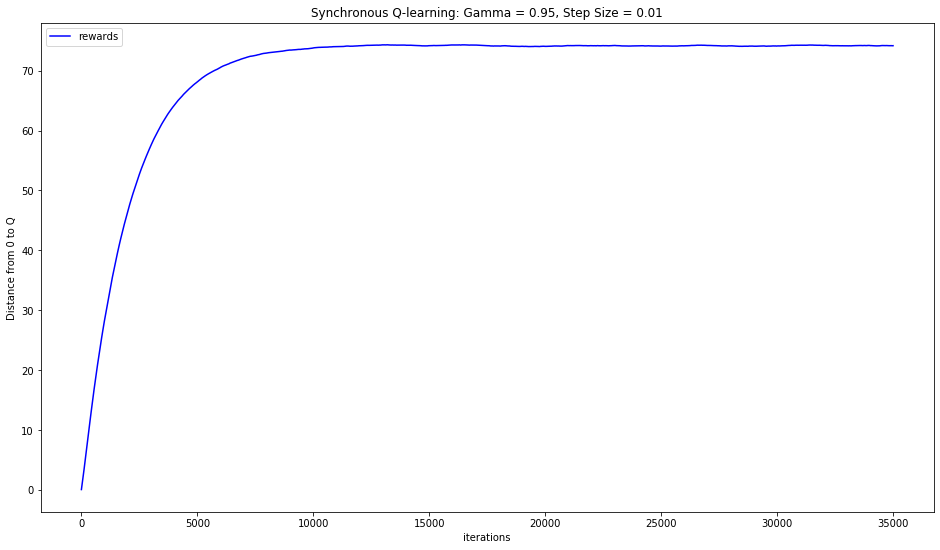

In [4]:
#initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        #print(self.transitions)
        self.rewards                           = np.random.rand(self.num_action,self.num_state) #,self.num_state)
        #print(self.rewards)

        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 35000, max_steps = 1,min_alpha=0.1, min_epsilon=0.1, epsilon = 1.0, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        #self.states = MarkovDP.states
        #self.actions = MarkovDP.actions
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        #self.mdp = mdp
        #self.V = np.zeros((env.num_state,1)+(env.num_action,1))#(env.num_state,1))
        #print(self.V)
        #print((env.num_state, env.num_action))
        self.QTable = np.zeros((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]]) #[a][s]
        
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        #exploration-exploitation = np.random.random()
        #best = np.argmax(self.QTable[state])
        #random = env.action_space.sample()  # select a random action (see https://github.com/openai/gym/wiki/CartPole-v0) # exploration
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)   
        else:
            action = np.argmax(self.QTable[state])  # exploitation
            #print("best state", np.argmax(self.QTable[state]))
        return action

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        #print(self.QTable)
    # Q- values updates - Qk+1(s,a) = Qk(s,a) + alpha[R(s, a, s')+ gamma(maxQk(s,a,))- Qk(s,a)]
        # Updating Q-value of state-action pair based on the update equation - exploration rate
    
    """def decay_epsilon(self, t): 
        #print(max(self.min_epsilon, min(1, 1.0 - math.log((t + 1) / self.decay), math.e)))  #decay cannot be 1 or it decays too fast and the system doesn't explore enough
        return max(self.min_epsilon, min(1, 1.0 - math.log((t + 1) / self.decay), math.e))  #works with logbase10 as well???"""
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 

    """def decay_step_size(self, t):
           ##### DIMINISHING STEP SIZES ####
        #print(max(self.min_alpha, min(1.0, 1.0 - math.log10((t + 1) / self.decay)))) #log(timestep*decayrate)
        return max(self.min_alpha, min(1.0, 1.0 - math.log((t + 1) / self.decay), math.e)) """
    
    def decay_step_size(self, t):
        num = self.alpha
        dem = t**self.beta
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = num / dem  
        return step_size
    
#1-ln(time unit/decay)
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        #episodes = []
        # this part until the end of the while loop:
        # this is the part of the function that trains the enviornment.
        for e in range(self.max_episodes):  
            if e % 10000 == 0:
                print(e)
            #state1 = np.random.randint(0,9) #self.env.reset()
            epsilon = self.decay_epsilon() #e)
            step_size = 0.01 #self.decay_step_size(e)
            for state in self.env.states:
                for action in self.env.actions:
                    transitionVector = self.env.transitions[action][state]
                    new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                    new_state = new_state[0]
                    reward = self.env.rewards[action][state] #[new_state]
                    #print(reward)
                    self.Q_Update(state, action, reward, new_state, step_size)
            rewards.append(np.linalg.norm(self.QTable-self.zeros))#averageQ)
            alphaList.append(step_size)
            epsilonList.append(epsilon)
            mean_rewards =  np.mean(rewards)
        print(self.QTable)
        #print(self.V)
        return rewards, alphaList, epsilonList

if __name__ == '__main__':
    ''' Run main program. '''
    #main()
    #env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
    #env.initialize_mdp()    #Define P and R
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    rewards, alpha, epsilon = solve.learning()
    print(max(rewards))
    #moving_ave = solve.moving_average(rewards)
    fig = plt.figure(figsize=(16,9))
    #ax1 = fig.add_subplot(211)
    """ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')
    #ax2 = fig.add_subplot(212)
    ax2.plot(alpha,  # epsilon_hist,
             color='b',
             label='step size')
    ax2.set(title='Step Size Plot',
            ylabel='Alpha',
            xlabel='episodes')"""
    ax3 = fig.add_subplot(111)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='Synchronous Q-learning: Gamma = 0.95, Step Size = 0.01',
            ylabel='Distance from 0 to Q',
            xlabel='iterations')
    #fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    #ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()

    
    #plt.plot(alpha)
    #plt.xlabel('episodes')
    #plt.ylabel('rewards') 
    #plt.show()

# Distance from optimal

0
10000
20000
30000
[[13.22527507 13.34721711 14.05744056]
 [13.52822402 13.11294316 13.22543276]
 [13.28793639 13.8592251  13.48449146]
 [13.66435977 13.45844067 13.22952054]
 [13.98639683 13.39165792 13.43457766]
 [13.42437277 13.81528241 13.55897481]
 [13.15680275 13.49513913 13.59495461]
 [13.24521473 13.8598864  13.89707968]
 [13.86931464 13.86704912 13.73166768]
 [13.22886605 13.51135105 13.35361228]]


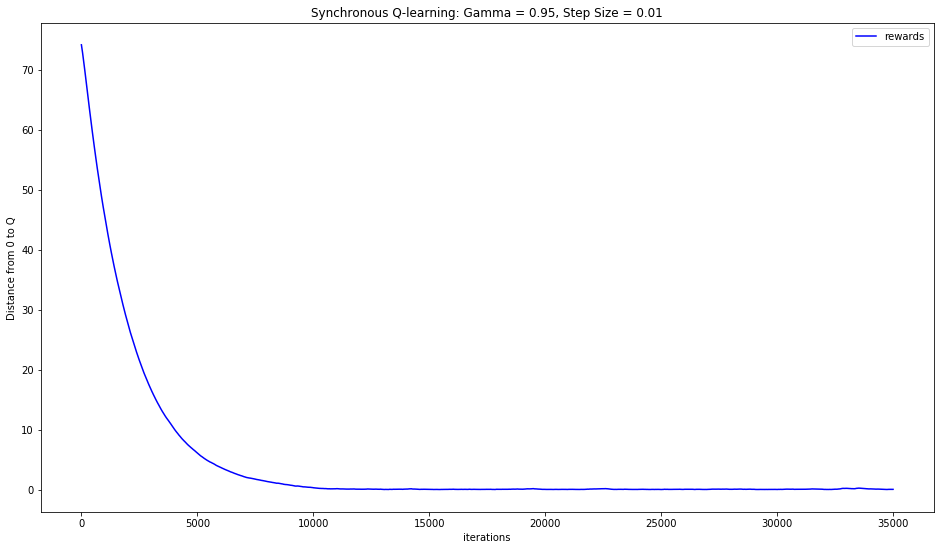

In [1]:
#initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        #print(self.transitions)
        self.rewards                           = np.random.rand(self.num_action,self.num_state) #,self.num_state)
        #print(self.rewards)

        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 35000, max_steps = 1,min_alpha=0.1, min_epsilon=0.0, epsilon = 1.0, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.zeros((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        #self.rewards = np.array([[0.04292419, 0.33307203, 0.09973295, 0.47558912, 0.82002244, 0.29818736,0.1509349,  0.33026704, 0.81388014, 0.14038396], [0.22736245, 0.06885196, 0.70571004, 0.39523324, 0.31083998, 0.71862639, 0.33597754, 0.72777127, 0.8151994,  0.21766284], [0.9738187,  0.16235795, 0.29084091, 0.17979529, 0.34550566, 0.48006089, 0.52217587, 0.85360604, 0.88944791, 0.22010386]])
        #self.QFunction = np.array([[33.95194609, 34.05860066, 34.77345539], [34.24835596, 33.84102827, 33.94270157], [34.02202821, 34.58894248, 34.23688255], [34.38667542, 34.19158544, 33.95619866], [34.72368381, 34.13140256, 34.15864593], [34.14239396, 34.56598231, 34.28597849], [33.90024229, 34.21859993, 34.31248766], [33.95650495, 34.58472193, 34.614587  ], [34.58343484, 34.58892851, 34.45174795],[33.96922249, 34.24687297, 34.09476652]])
        #self.transitions = np.array([[[0, 0, 0, 0, 0, 0, 0, 0.47213411, 0.52786589, 0], [0.23151979, 0.01998676, 0.22127693, 0, 0.06981873, 0.0427862, 0.10467982, 0.12070309, 0.18922869, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],[0.30368162, 0, 0, 0.25661536, 0, 0, 0, 0.39303185, 0.04667117, 0],[0.17812209, 0.01085392, 0.31277349, 0.10361547, 0, 0.04559891, 0.03139476, 0.31764135, 0, 0],[0.24049966, 0.29684653, 0, 0, 0.1539215,  0.10658198, 0.05643442, 0, 0.14571591, 0],[0.07697128, 0.05091228, 0.44022796, 0, 0, 0, 0, 0, 0, 0.43188848],[0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0.03246495, 0, 0.00475867, 0, 0.50693326, 0.36230239, 0.09354073, 0],[0.11215198, 0.11699652, 0, 0.10959476, 0.03296511, 0.26794035, 0.11095759, 0.15551604, 0.09387765, 0]], [[0.12850056, 0.10343631, 0, 0.09953688, 0.11388147, 0.09595513, 0.18509471, 0.09409333, 0.1795016, 0],[0, 0.32924822, 0, 0, 0, 0.67075178, 0, 0, 0, 0],[0, 0.0755375,  0.47557293, 0, 0, 0, 0, 0.44888957, 0, 0],[0.1158831,  0.15402211, 0.07514983, 0.09808033, 0.1960788,  0.04886819, 0.07476964, 0.00912034, 0.06193483, 0.16609284],[0.23899354, 0.0655907,  0, 0.17776072, 0.2287395,  0, 0.06159055, 0, 0, 0.22732499],[0.03233116, 0.02864308, 0.15378553, 0.15403636, 0.1328941,  0.14596274, 0.09721679, 0.15121338, 0.08218625, 0.02173061],[0.1577313,  0, 0.15558799, 0.089663,   0.08934407, 0.06768264, 0, 0.16529423, 0.15622294, 0.11847382],[0, 0, 0, 0, 0.38058824, 0, 0.35815743, 0.26125433, 0, 0],[0.01379299, 0.03726099, 0.03415781, 0.10157469, 0.0791237,  0.1806215, 0.29088836, 0.18618146, 0, 0.07639849],[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], [[0.10182063, 0.12295227, 0.18209398, 0.22582416, 0.02763395, 0.02520401, 0.13889813, 0.17557287, 0, 0],[0.07740746, 0.11523072, 0.11409477, 0, 0.09837254, 0, 0.18240537, 0.11390899, 0.1232118,  0.17536835],[0.21813953, 0, 0.07930457, 0.00795801, 0.21562846, 0.35072226, 0, 0.09274496, 0, 0.03550221],[0, 0, 0.28331664, 0.21787373, 0, 0.14377851, 0.10800369, 0.10471031, 0, 0.14231713],[0, 0.00210967, 0, 0.48531985, 0, 0, 0, 0.51257048, 0, 0],[0.02629692, 0.14818823, 0.03755372, 0.19828231, 0, 0.20812823, 0.04101115, 0.34053944, 0, 0],[0, 0.31967908, 0.29587723, 0, 0.25809472, 0, 0.12634896, 0, 0, 0],[0, 0.21913456, 0.18172365, 0, 0, 0.22663922,  0.17511239, 0.0436282,  0.11917704, 0.03458494],[0, 0.25082079, 0, 0, 0, 0, 0, 0, 0, 0.74917921], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]])
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]]) #[a][s]
        #[a][s][s]self.QFunction = np.array([[15.20646845, 14.86177975, 14.9114879 ], [15.05799151, 15.03910068, 14.92015383], [15.2758712,  14.93548919, 14.99307094], [14.73872372, 14.69862678, 14.98256008], [14.86629606, 15.02329702, 15.29307044], [15.19962838, 15.10885264, 15.04043779], [15.11498938, 14.98902133, 14.80936334], [14.38990096, 14.885329,   15.18133175], [14.85297691, 14.82621978, 15.57747182], [15.00369472, 15.52641092, 14.89785922]])        
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        #exploration-exploitation = np.random.random()
        #best = np.argmax(self.QTable[state])
        #random = env.action_space.sample()  # select a random action (see https://github.com/openai/gym/wiki/CartPole-v0) # exploration
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)   
        else:
            action = np.argmax(self.QTable[state])  # exploitation
            #print("best state", np.argmax(self.QTable[state]))
        return action

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        #print(self.QTable)
    # Q- values updates - Qk+1(s,a) = Qk(s,a) + alpha[R(s, a, s')+ gamma(maxQk(s,a,))- Qk(s,a)]
        # Updating Q-value of state-action pair based on the update equation - exploration rate
    
    """def decay_epsilon(self, t): 
        #print(max(self.min_epsilon, min(1, 1.0 - math.log((t + 1) / self.decay), math.e)))  #decay cannot be 1 or it decays too fast and the system doesn't explore enough
        return max(self.min_epsilon, min(1, 1.0 - math.log((t + 1) / self.decay), math.e))  #works with logbase10 as well???"""
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 

    """def decay_step_size(self, t):
           ##### DIMINISHING STEP SIZES ####
        #print(max(self.min_alpha, min(1.0, 1.0 - math.log10((t + 1) / self.decay)))) #log(timestep*decayrate)
        return max(self.min_alpha, min(1.0, 1.0 - math.log((t + 1) / self.decay), math.e)) """
    
    def decay_step_size(self, t):
        num = self.alpha
        dem = t**self.beta
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = num / dem
            if step_size < 0.1:
                step_size = 0.7
        return step_size
    
#1-ln(time unit/decay)
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        #episodes = []
        # this part until the end of the while loop:
        # this is the part of the function that trains the enviornment.
        for e in range(self.max_episodes):  
            if e % 10000 == 0:
                print(e)
            #state1 = np.random.randint(0,9) #self.env.reset()
            epsilon = self.decay_epsilon() #e)
            step_size = 0.01 #self.decay_step_size(e)
            for state in self.env.states:
                for action in self.env.actions:
                    transitionVector = self.env.transitions[action][state]
                    new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                    new_state = new_state[0]
                    reward = self.env.rewards[action][state] #[new_state]
                    self.Q_Update(state, action, reward, new_state, step_size)
            rewards.append(np.linalg.norm(self.QTable-self.QFunction))#averageQ)
            alphaList.append(step_size)
            epsilonList.append(epsilon)
            mean_rewards =  np.mean(rewards)
        #print(self.QTable)
        #print(self.V)
        return rewards, alphaList, epsilonList

if __name__ == '__main__':
    ''' Run main program. '''
    #main()
    #env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
    #env.initialize_mdp()    #Define P and R
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    rewards, alpha, epsilon = solve.learning()
    #print(rewards[len(rewards)-1])
    #moving_ave = solve.moving_average(rewards)
    fig = plt.figure(figsize=(16,9))
    #ax1 = fig.add_subplot(211)
    """ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')
    #ax2 = fig.add_subplot(212)
    ax2.plot(alpha,  # epsilon_hist,
             color='b',
             label='step size')
    ax2.set(title='Step Size Plot',
            ylabel='Alpha',
            xlabel='episodes')"""
    ax3 = fig.add_subplot(111)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='Synchronous Q-learning: Gamma = 0.95, Step Size = 0.01',
            ylabel='Distance from 0 to Q',
            xlabel='iterations')
    #fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    #ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()

    
    #plt.plot(alpha)
    #plt.xlabel('episodes')
    #plt.ylabel('rewards') 
    #plt.show()

# Diminishing Step Size

0
[[13.65570779 13.78355937 14.37563112]
 [13.6711895  13.20052557 13.29453653]
 [13.71113941 14.26040759 13.82029821]
 [14.0612181  14.05688538 13.67773006]
 [14.41557211 13.74894893 13.74221961]
 [13.9948908  14.13409391 14.05642916]
 [13.35864367 13.96191905 13.67846279]
 [13.6198716  14.32819309 14.18873177]
 [14.11576413 14.11814838 14.02680022]
 [13.72922341 13.87918679 13.6778062 ]]
2.0013908591137533


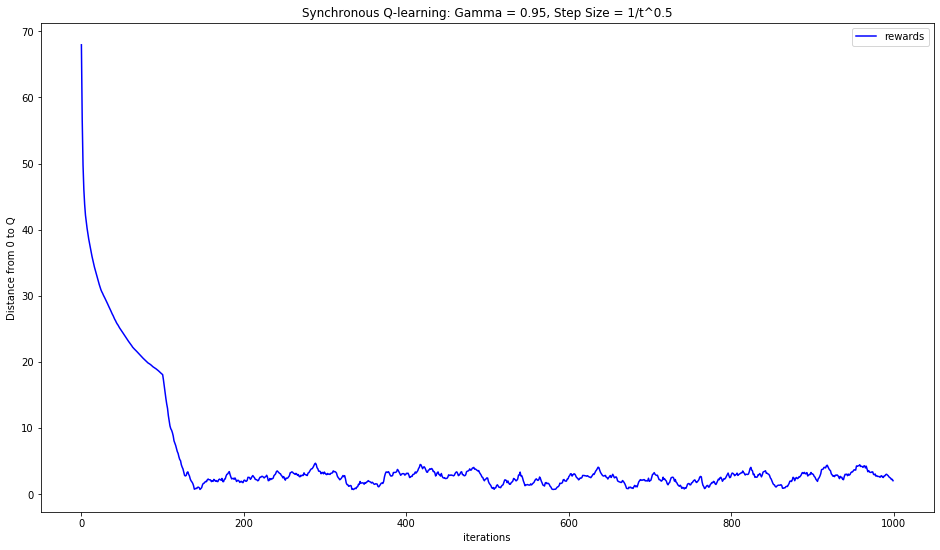

In [7]:
#initialized with random values:
#When initialized with random values it does not converge all the time, but a fair amount of the time

import gym
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        #print(self.transitions)
        self.rewards                           = np.random.rand(self.num_action,self.num_state) #,self.num_state)
        #print(self.rewards)

        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 1000, max_steps = 1,min_alpha=0.1, min_epsilon=0.0, epsilon = 1.0, gamma = 0.95, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.zeros((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        #self.rewards = np.array([[0.04292419, 0.33307203, 0.09973295, 0.47558912, 0.82002244, 0.29818736,0.1509349,  0.33026704, 0.81388014, 0.14038396], [0.22736245, 0.06885196, 0.70571004, 0.39523324, 0.31083998, 0.71862639, 0.33597754, 0.72777127, 0.8151994,  0.21766284], [0.9738187,  0.16235795, 0.29084091, 0.17979529, 0.34550566, 0.48006089, 0.52217587, 0.85360604, 0.88944791, 0.22010386]])
        #self.QFunction = np.array([[33.95194609, 34.05860066, 34.77345539], [34.24835596, 33.84102827, 33.94270157], [34.02202821, 34.58894248, 34.23688255], [34.38667542, 34.19158544, 33.95619866], [34.72368381, 34.13140256, 34.15864593], [34.14239396, 34.56598231, 34.28597849], [33.90024229, 34.21859993, 34.31248766], [33.95650495, 34.58472193, 34.614587  ], [34.58343484, 34.58892851, 34.45174795],[33.96922249, 34.24687297, 34.09476652]])
        #self.transitions = np.array([[[0, 0, 0, 0, 0, 0, 0, 0.47213411, 0.52786589, 0], [0.23151979, 0.01998676, 0.22127693, 0, 0.06981873, 0.0427862, 0.10467982, 0.12070309, 0.18922869, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],[0.30368162, 0, 0, 0.25661536, 0, 0, 0, 0.39303185, 0.04667117, 0],[0.17812209, 0.01085392, 0.31277349, 0.10361547, 0, 0.04559891, 0.03139476, 0.31764135, 0, 0],[0.24049966, 0.29684653, 0, 0, 0.1539215,  0.10658198, 0.05643442, 0, 0.14571591, 0],[0.07697128, 0.05091228, 0.44022796, 0, 0, 0, 0, 0, 0, 0.43188848],[0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0.03246495, 0, 0.00475867, 0, 0.50693326, 0.36230239, 0.09354073, 0],[0.11215198, 0.11699652, 0, 0.10959476, 0.03296511, 0.26794035, 0.11095759, 0.15551604, 0.09387765, 0]], [[0.12850056, 0.10343631, 0, 0.09953688, 0.11388147, 0.09595513, 0.18509471, 0.09409333, 0.1795016, 0],[0, 0.32924822, 0, 0, 0, 0.67075178, 0, 0, 0, 0],[0, 0.0755375,  0.47557293, 0, 0, 0, 0, 0.44888957, 0, 0],[0.1158831,  0.15402211, 0.07514983, 0.09808033, 0.1960788,  0.04886819, 0.07476964, 0.00912034, 0.06193483, 0.16609284],[0.23899354, 0.0655907,  0, 0.17776072, 0.2287395,  0, 0.06159055, 0, 0, 0.22732499],[0.03233116, 0.02864308, 0.15378553, 0.15403636, 0.1328941,  0.14596274, 0.09721679, 0.15121338, 0.08218625, 0.02173061],[0.1577313,  0, 0.15558799, 0.089663,   0.08934407, 0.06768264, 0, 0.16529423, 0.15622294, 0.11847382],[0, 0, 0, 0, 0.38058824, 0, 0.35815743, 0.26125433, 0, 0],[0.01379299, 0.03726099, 0.03415781, 0.10157469, 0.0791237,  0.1806215, 0.29088836, 0.18618146, 0, 0.07639849],[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], [[0.10182063, 0.12295227, 0.18209398, 0.22582416, 0.02763395, 0.02520401, 0.13889813, 0.17557287, 0, 0],[0.07740746, 0.11523072, 0.11409477, 0, 0.09837254, 0, 0.18240537, 0.11390899, 0.1232118,  0.17536835],[0.21813953, 0, 0.07930457, 0.00795801, 0.21562846, 0.35072226, 0, 0.09274496, 0, 0.03550221],[0, 0, 0.28331664, 0.21787373, 0, 0.14377851, 0.10800369, 0.10471031, 0, 0.14231713],[0, 0.00210967, 0, 0.48531985, 0, 0, 0, 0.51257048, 0, 0],[0.02629692, 0.14818823, 0.03755372, 0.19828231, 0, 0.20812823, 0.04101115, 0.34053944, 0, 0],[0, 0.31967908, 0.29587723, 0, 0.25809472, 0, 0.12634896, 0, 0, 0],[0, 0.21913456, 0.18172365, 0, 0, 0.22663922,  0.17511239, 0.0436282,  0.11917704, 0.03458494],[0, 0.25082079, 0, 0, 0, 0, 0, 0, 0, 0.74917921], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]])
        self.QFunction = np.array([[13.23176522, 13.33925622, 14.05469772], [13.52671959, 13.1224803,  13.22367197], [13.30159516, 13.86810447, 13.51346527], [13.66552722, 13.47151662, 13.23704243], [14.00228974, 13.41027839, 13.44004462], [13.42221627, 13.84567785, 13.56730379], [13.17987508, 13.49701082, 13.59308849], [13.24370111, 13.86450877, 13.89669707], [13.86681663, 13.87073118, 13.73493382], [13.24989143, 13.5198381,  13.37349781]]) #[a][s]
        #[a][s][s]self.QFunction = np.array([[15.20646845, 14.86177975, 14.9114879 ], [15.05799151, 15.03910068, 14.92015383], [15.2758712,  14.93548919, 14.99307094], [14.73872372, 14.69862678, 14.98256008], [14.86629606, 15.02329702, 15.29307044], [15.19962838, 15.10885264, 15.04043779], [15.11498938, 14.98902133, 14.80936334], [14.38990096, 14.885329,   15.18133175], [14.85297691, 14.82621978, 15.57747182], [15.00369472, 15.52641092, 14.89785922]])        
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        #exploration-exploitation = np.random.random()
        #best = np.argmax(self.QTable[state])
        #random = env.action_space.sample()  # select a random action (see https://github.com/openai/gym/wiki/CartPole-v0) # exploration
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)   
        else:
            action = np.argmax(self.QTable[state])  # exploitation
            #print("best state", np.argmax(self.QTable[state]))
        return action

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        # self.QTable[old_state][action] += alpha * (reward + self.gamma * np.max(self.Q[state_new]) - self.Q[state_old][action])
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        #print(self.QTable)
    # Q- values updates - Qk+1(s,a) = Qk(s,a) + alpha[R(s, a, s')+ gamma(maxQk(s,a,))- Qk(s,a)]
        # Updating Q-value of state-action pair based on the update equation - exploration rate
    
    """def decay_epsilon(self, t): 
        #print(max(self.min_epsilon, min(1, 1.0 - math.log((t + 1) / self.decay), math.e)))  #decay cannot be 1 or it decays too fast and the system doesn't explore enough
        return max(self.min_epsilon, min(1, 1.0 - math.log((t + 1) / self.decay), math.e))  #works with logbase10 as well???"""
    
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 

    """def decay_step_size(self, t):
           ##### DIMINISHING STEP SIZES ####
        #print(max(self.min_alpha, min(1.0, 1.0 - math.log10((t + 1) / self.decay)))) #log(timestep*decayrate)
        return max(self.min_alpha, min(1.0, 1.0 - math.log((t + 1) / self.decay), math.e)) """
    
    def decay_step_size(self, t):
        num = self.alpha
        dem = t**self.beta
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = num / dem
            if step_size < 0.1:
                step_size = 0.7
        return step_size
    
#1-ln(time unit/decay)
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        #episodes = []
        # this part until the end of the while loop:
        # this is the part of the function that trains the enviornment.
        for e in range(self.max_episodes):  
            if e % 10000 == 0:
                print(e)
            #state1 = np.random.randint(0,9) #self.env.reset()
            epsilon = self.decay_epsilon() #e)
            step_size = self.decay_step_size(e)
            for state in self.env.states:
                for action in self.env.actions:
                    transitionVector = self.env.transitions[action][state]
                    new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                    new_state = new_state[0]
                    reward = self.env.rewards[action][state] #[new_state]
                    self.Q_Update(state, action, reward, new_state, step_size)
            rewards.append(np.linalg.norm(self.QTable-self.QFunction))#averageQ)
            alphaList.append(step_size)
            epsilonList.append(epsilon)
            mean_rewards =  np.mean(rewards)
        print(self.QTable)
        #print(self.V)
        return rewards, alphaList, epsilonList

if __name__ == '__main__':
    ''' Run main program. '''
    #main()
    #env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
    #env.initialize_mdp()    #Define P and R
    env = MarkovDP(10,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    rewards, alpha, epsilon = solve.learning()
    print(rewards[len(rewards)-1])
    #moving_ave = solve.moving_average(rewards)
    fig = plt.figure(figsize=(16,9))
    #ax1 = fig.add_subplot(211)
    """ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')
    #ax2 = fig.add_subplot(212)
    ax2.plot(alpha,  # epsilon_hist,
             color='b',
             label='step size')
    ax2.set(title='Step Size Plot',
            ylabel='Alpha',
            xlabel='episodes')"""
    ax3 = fig.add_subplot(111)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='Synchronous Q-learning: Gamma = 0.95, Step Size = 1/t^0.5',
            ylabel='Distance from 0 to Q',
            xlabel='iterations')
    #fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    #ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()

    
    #plt.plot(alpha)
    #plt.xlabel('episodes')
    #plt.ylabel('rewards') 
    #plt.show()